# IEA29 REF1 ABL precursor
## Filtering the sample data to find the right conditions

In [1]:
%%capture
# Important header information
naluhelperdir = './'
import sys
# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patches as patches
%matplotlib inline

# Define some text colors
# From https://stackoverflow.com/questions/287871/how-to-print-colored-text-to-the-terminal
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

### Post-processing
Generate the output with something like

    python filterconditions.py --jpts `seq 0 4 255` --np 64 -v

This will compute all `jpts` from 0, 4, ... 252 using 64 cores, and use verbose mode.

In [2]:
datadir='./' 
#datadir='/ascldap/users/lcheung/GPFS1/2020/IEATask29/IEATask29_precursor.github/REF1/filterconditions'
outfileprefix='output_j'
jpts=np.arange(0,255,4) #[0, 4, 8, 16]

#dat=[]
# Load the data files
for ij, j in enumerate(jpts):
    outfile=outfileprefix+repr(j)+'.dat'
    try:
        newdat=np.loadtxt(datadir+'/'+outfile)
        print('Loaded   '+outfile)
        if ij==0: 
            dat=np.array(newdat)
        else:
            dat=np.append(dat, newdat, axis=0)
    except:
        print('Skipping '+outfile)
        
print('Total size = '+repr(len(dat)))
print('max x,y    = '+repr(max(dat[:,5]))+', '+repr(max(dat[:,6])))
print('max T2     = '+repr(max(dat[:,1])))
#print(dat)
#print(dat[:,0:4])
# Split the vector
UX    = dat[:,8]
TI    = dat[:,11]/dat[:,8]
ALPHA = dat[:,-1]

Loaded   output_j0.dat
Loaded   output_j4.dat
Loaded   output_j8.dat
Loaded   output_j12.dat
Loaded   output_j16.dat
Loaded   output_j20.dat
Loaded   output_j24.dat
Loaded   output_j28.dat
Loaded   output_j32.dat
Loaded   output_j36.dat
Loaded   output_j40.dat
Loaded   output_j44.dat
Loaded   output_j48.dat
Loaded   output_j52.dat
Loaded   output_j56.dat
Loaded   output_j60.dat
Loaded   output_j64.dat
Loaded   output_j68.dat
Loaded   output_j72.dat
Loaded   output_j76.dat
Loaded   output_j80.dat
Loaded   output_j84.dat
Loaded   output_j88.dat
Loaded   output_j92.dat
Loaded   output_j96.dat
Loaded   output_j100.dat
Loaded   output_j104.dat
Loaded   output_j108.dat
Loaded   output_j112.dat
Loaded   output_j116.dat
Loaded   output_j120.dat
Loaded   output_j124.dat
Loaded   output_j128.dat
Loaded   output_j132.dat
Loaded   output_j136.dat
Loaded   output_j140.dat
Loaded   output_j144.dat
Loaded   output_j148.dat
Loaded   output_j152.dat
Loaded   output_j156.dat
Loaded   output_j160.dat
Loa

In [3]:
# Filter by wind speed
targetU     = 6.13
targetTI    = 0.068
targetAlpha = 0.025

In [4]:
# Define min,max conditions
minU     = targetU - 0.03   # 0.04
maxU     = targetU + 0.02   # 0.04
minalpha = 0.0225
maxalpha = 0.0275
minTI    = targetTI - 0.002 # 0.0025
maxTI    = targetTI + 0.002 # 0.0025
xbox     = [0, 6144]
ybox     = [0, 6144]
xbuffer  = [1000,1000]
ybuffer  = [1000,1000]

In [5]:
# Get points falling within minU and maxU
filterU=((minU<=dat[:,8])&(dat[:,8]<=maxU))
datU=dat[filterU,:]

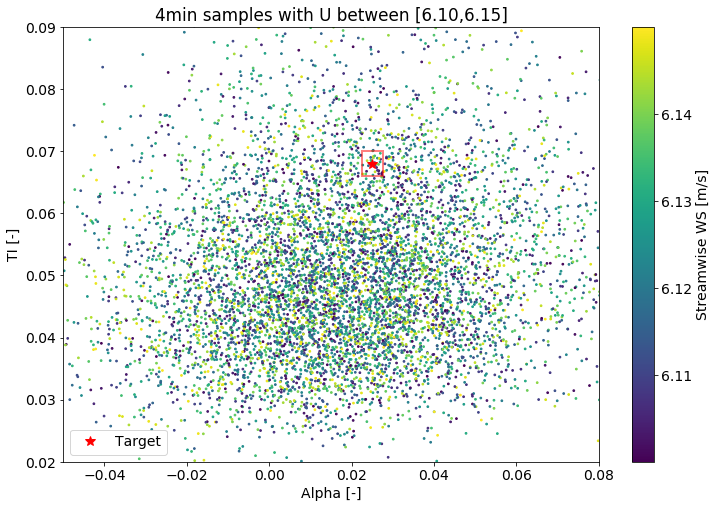

In [6]:
plt.rc('font', size=14)
fig, ax = plt.subplots(1,figsize=(12,8))
#plt.figure(figsize=(12,8))

rect = patches.Rectangle((minalpha, minTI), (maxalpha-minalpha), (maxTI-minTI), linewidth=2, edgecolor='r', facecolor='none', alpha=0.5)
ax.add_patch(rect)

plt.plot(targetAlpha, targetTI, '*', color='r', markersize=10, label='Target')
plt.scatter(ALPHA[filterU], TI[filterU],c=UX[filterU],s=3)
cbar=plt.colorbar()
cbar.ax.set_ylabel('Streamwise WS [m/s]', rotation=90)
plt.xlim([-0.05, 0.08])
plt.ylim([0.02, 0.09])
plt.ylabel('TI [-]')
plt.xlabel('Alpha [-]')
plt.legend(frameon=True)
plt.title('4min samples with U between [%.2f,%.2f]'%(minU, maxU));

In [7]:
# ###############################
# Print the filtered results
# ###############################

# define some shorthands
def printheader():
    print(bcolors.BOLD+'%7s %7s %3s %3s %3s %6s %6s %6s %8s %8s %8s'%('T1', 'T2','I','J','K', 'X', 'Y', 'Z','UX','STD_U/U','ALPHA')+bcolors.ENDC)

def printrow(r,color):
    print(color+'%.1f %.1f %3i %3i %3i %6.1f %6.1f %6.1f %f %f %f'%(r[0], r[1], int(r[2]), int(r[3]), int(r[4]), r[5],r[6],r[7], r[8], r[11]/r[8], r[-1])+bcolors.ENDC)
    
# print the header
print("All conditions matching criteria:")
print(" %f <=   U   <= %f"%(minU, maxU))
print(" %f <=   TI  <= %f"%(minTI, maxTI))
print(" %f <= ALPHA <= %f"%(minalpha, maxalpha))
print()
print('Highlighted in '+bcolors.BOLD+'BOLD'+bcolors.ENDC+' lie within')
print(" %f <= x <= %f"%(xbox[0]+xbuffer[0], xbox[1]-xbuffer[1]))
print(" %f <= y <= %f"%(ybox[0]+ybuffer[0], ybox[1]-ybuffer[1]))
print()

printheader()
goodsamples=[]
badsamples=[]
for irow, row in enumerate(dat):
    x, y, z = row[5], row[6], row[7]
    u    = row[8]
    a    = row[-1]
    tiu  = row[11]/u
    COLOR=''
    insidebox=False
    if (xbox[0]+xbuffer[0] <= x) and (x <= xbox[1]-xbuffer[1]) and (ybox[0]+ybuffer[0] <= y) and (y<= ybox[1]-ybuffer[1]): 
        COLOR=bcolors.BOLD
        insidebox=True
    if (minU<=u) and (u<=maxU) and (minalpha <= a) and (a <= maxalpha) and (minTI <= tiu) and (tiu <= maxTI):
        #print(COLOR+'%.1f %.1f %3i %3i %3i %6.1f %6.1f %6.1f %f %f %f'%(row[0], row[1], int(row[2]), int(row[3]), int(row[4]), x,y,z, u, tiu, a)+bcolors.ENDC)
        printrow(row, COLOR)
        if insidebox: 
            goodsamples.append(row)
        else:
            badsamples.append(row)
            
goodsamples=np.array(goodsamples)
badsamples=np.array(badsamples)

All conditions matching criteria:
 6.100000 <=   U   <= 6.150000
 0.066000 <=   TI  <= 0.070000
 0.022500 <= ALPHA <= 0.027500

Highlighted in BOLD lie within
 1000.000000 <= x <= 5144.000000
 1000.000000 <= y <= 5144.000000

     T1      T2   I   J   K      X      Y      Z       UX  STD_U/U    ALPHA
18120.0 18360.0 180  16   3 4336.9  385.5   57.0 6.145812 0.067965 0.026155
18120.0 18360.0 184  16   3 4433.3  385.5   57.0 6.147410 0.069142 0.025271
16200.0 16440.0 144  20   3 3469.6  481.9   57.0 6.133140 0.069659 0.026968
16920.0 17160.0  64  24   3 1542.0  578.3   57.0 6.103812 0.066764 0.023624
15720.0 15960.0 248  56   3 5975.3 1349.3   57.0 6.136847 0.068541 0.024675
17880.0 18120.0 180  56   3 4336.9 1349.3   57.0 6.128006 0.066158 0.025166
15000.0 15240.0 248  68   3 5975.3 1638.4   57.0 6.132366 0.068404 0.024834
17640.0 17880.0 236  68   3 5686.2 1638.4   57.0 6.138729 0.067871 0.026525
17160.0 17400.0   8  72   3  192.8 1734.8   57.0 6.107653 0.067365 0.026060
17640.0 17880.

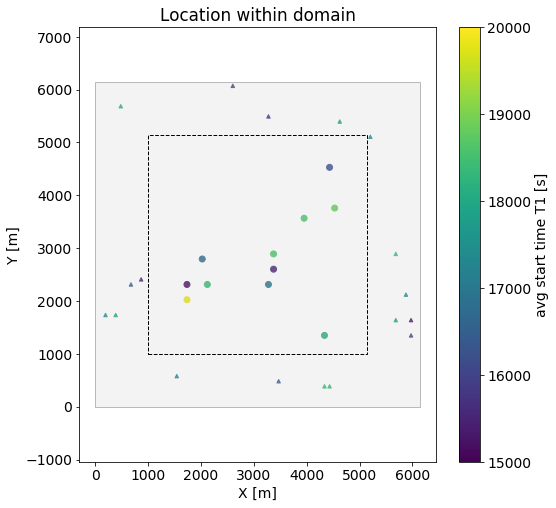

In [8]:
# Plot the location of good points
fig, ax = plt.subplots(1,figsize=(8,8))
rect = patches.Rectangle((xbox[0],ybox[0]), xbox[1]-xbox[0], ybox[1]-ybox[0], linewidth=1, edgecolor='k', facecolor='lightgray',alpha=0.25)
ax.add_patch(rect)
rect = patches.Rectangle((xbox[0]+xbuffer[0],ybox[0]+ybuffer[0]), xbox[1]-xbox[0]-sum(xbuffer), ybox[1]-ybox[0]-sum(ybuffer), 
                         linewidth=1, edgecolor='k', facecolor='none', linestyle='--')
ax.add_patch(rect)
if len(goodsamples)>0: plt.scatter(goodsamples[:,5],goodsamples[:,6],c=goodsamples[:,1], marker='o', vmin=15000, vmax=20000)
plt.scatter(badsamples[:,5], badsamples[:,6], c=badsamples[:,1], marker='^', s=12, vmin=15000, vmax=20000)
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.colorbar().ax.set_ylabel('avg start time T1 [s]', rotation=90)
plt.title('Location within domain')
plt.axis('equal');

### Print only the ones matching all criteria

In [9]:
print("All conditions matching criteria:")
print(" %f <=   U   <= %f"%(minU, maxU))
print(" %f <=   TI  <= %f"%(minTI, maxTI))
print(" %f <= ALPHA <= %f"%(minalpha, maxalpha))
print(" %.3f <=   x   <= %.3f"%(xbox[0]+xbuffer[0], xbox[1]-xbuffer[1]))
print(" %.3f <=   y   <= %.3f"%(ybox[0]+ybuffer[0], ybox[1]-ybuffer[1]))
print()
printheader()
for row in goodsamples: printrow(row, '')

print('\nTotal %i candidates found'%len(goodsamples))

All conditions matching criteria:
 6.100000 <=   U   <= 6.150000
 0.066000 <=   TI  <= 0.070000
 0.022500 <= ALPHA <= 0.027500
 1000.000 <=   x   <= 5144.000
 1000.000 <=   y   <= 5144.000

     T1      T2   I   J   K      X      Y      Z       UX  STD_U/U    ALPHA
17880.0 18120.0 180  56   3 4336.9 1349.3   57.0 6.128006 0.066158 0.025166
19560.0 19800.0  72  84   3 1734.8 2023.9   57.0 6.134673 0.069249 0.025592
15000.0 15240.0  72  96   3 1734.8 2313.0   57.0 6.123323 0.068878 0.026254
16680.0 16920.0 136  96   3 3276.8 2313.0   57.0 6.145181 0.066684 0.025684
18120.0 18360.0  88  96   3 2120.3 2313.0   57.0 6.105696 0.068701 0.027014
15240.0 15480.0 140 108   3 3373.2 2602.2   57.0 6.107237 0.068151 0.025599
16440.0 16680.0  84 116   3 2023.9 2794.9   57.0 6.101912 0.066181 0.027327
18360.0 18600.0 140 120   3 3373.2 2891.3   57.0 6.114893 0.068995 0.024621
18360.0 18600.0 164 148   3 3951.4 3565.9   57.0 6.101714 0.066419 0.027295
18600.0 18840.0 188 156   3 4529.7 3758.7   57.0 6